In [23]:
# Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the continuous and discrete variables into continuous_df and discrete_df variables.
url = "./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
df = pd.read_csv(url)

def split_text_on_uppercase(s, keep_contiguous=False):
    """

    Args:
        s (str): string
        keep_contiguous (bool): flag to indicate we want to 
                                keep contiguous uppercase chars together

    Returns:

    """

    string_length = len(s)
    is_lower_around = (lambda: s[i-1].islower() or 
                       string_length > (i + 1) and s[i + 1].islower())

    start = 0
    parts = []
    for i in range(1, string_length):
        if s[i].isupper() and (not keep_contiguous or is_lower_around()):
            parts.append(s[start: i])
            start = i
    parts.append(s[start:])

    return "_".join(parts).lower()

def standardize_columns(cols):
    lst_std_columns=[]
    for c in cols:
        lst_std_columns.append(
            split_text_on_uppercase(c, True).replace(" ", "").replace("numberof", "qty"))
    return lst_std_columns

df.columns = standardize_columns(df.columns)
customer_df = df.copy()
customer_df = customer_df.set_index("customer")
customer_df.effective_to_date =  pd.to_datetime(
    customer_df.effective_to_date)
customer_df_numerical = customer_df.select_dtypes(np.number)
customer_df_categorical = customer_df.select_dtypes(object)
customer_df_date = customer_df.select_dtypes(np.datetime64)

def categorize_numeric(set=customer_df_numerical):
    """ Categorizes quantitative columns to continuous and discrete """
    discrete_subset = []
    continuous_subset = []
    for col in set.columns:
        unique_values_per_column = df[col].nunique()
        discrete_subset.append(col) if unique_values_per_column < 250 else continuous_subset.append(col)
    return set[discrete_subset], set[continuous_subset]

customer_df_discrete, customer_df_continuous = categorize_numeric()


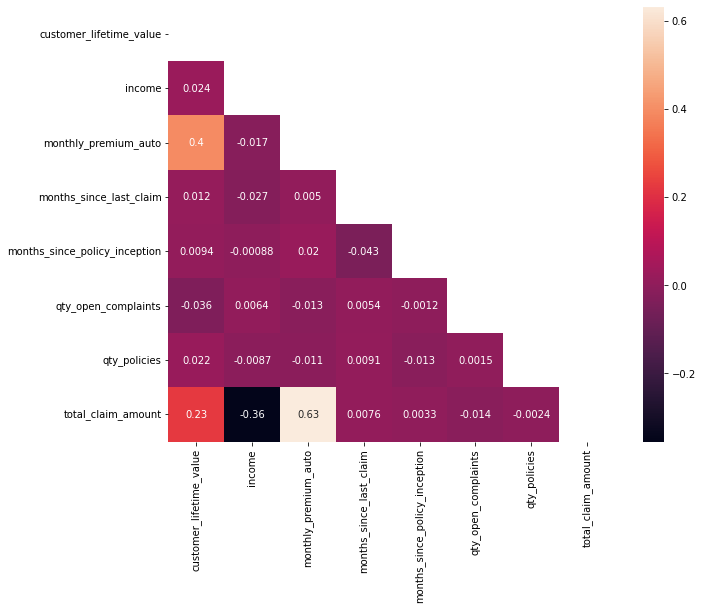

In [24]:
# Plot a correlation matrix, what can you see?
correlations_matrix = customer_df_numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


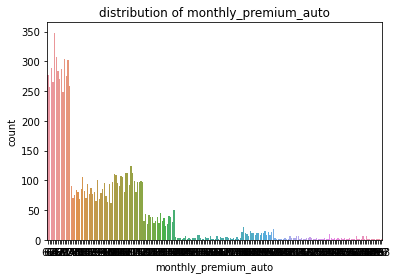

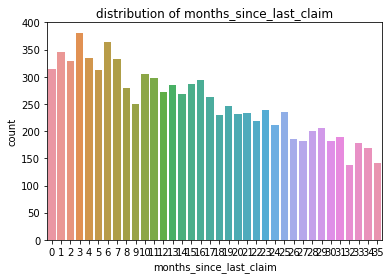

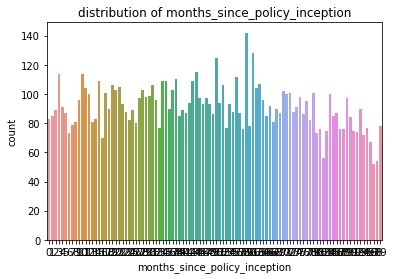

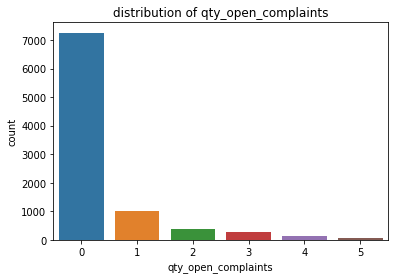

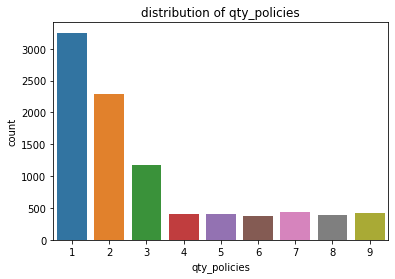

In [25]:
# Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
def plot_discrete(df):
    for col in df.columns:
        plt.figure()
        plt.title(f"distribution of {col}")
        sns.countplot(x=col, data=df, )
        
plot_discrete(customer_df_discrete)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='education'>

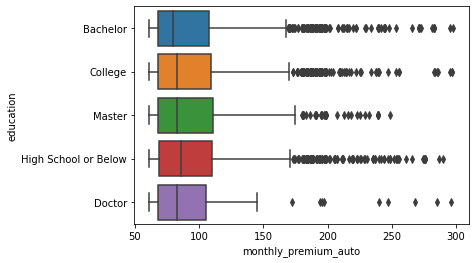

In [26]:
sns.boxplot(x='monthly_premium_auto', y= 'education', data=customer_df)

In [27]:

# What can you see in the plots?


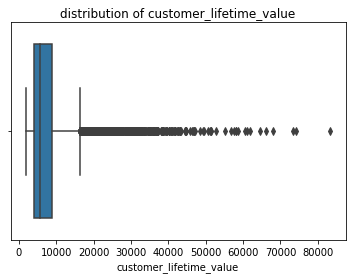

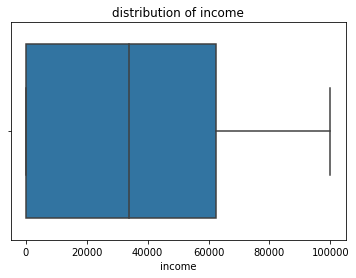

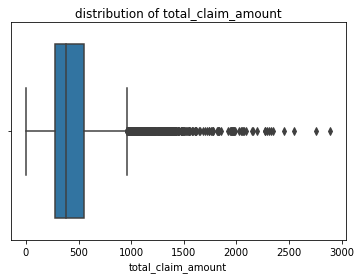

In [28]:
# Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
def plot_continuous(df):
    for col in df.columns:
        plt.figure()
        plt.title(f"distribution of {col}")
        sns.boxplot(x=col, data=df)
        
plot_continuous(customer_df_continuous)

In [29]:

# Have you found outliers? If you have, what should we do with them?

# Check nan values per column.

# Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

# for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

# Get categorical features.

# What should we do with the customer id column?